In [91]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import scipy
from scipy import io
import mne
import os
import pandas as pd
import numpy as np
import mne
import scipy
import pickle

In [2]:
thr_space = np.arange(0, 200, 5)
time_window_space = np.arange(0, 50, 1)
subjects = ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015']

In [3]:
PATH_SW_SAVE = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\SW_MOV_PR\\"

In [7]:
def get_dict_res(F1_max, AUC_max, F1_search, AUC_search, thr_best_F1, tw_best_F1,loc):
    files = os.listdir(PATH_SW_SAVE)
    thr_subs = []
    tw_subs = []
    best_subs_F1 = []
    best_subs_AUC = []
    F1_landscape_subs = []
    AUC_landscape_subs = []

    for sub in subjects:
        f_ = [f for f in files if sub in f and loc in f]
        thr_sub = []
        tw_sub = []
        best_sub_F1 = []
        best_sub_AUC = []
        F1_landscape_sub =[]
        AUC_landscape_sub = []
        for f in f_:
            res = np.load(os.path.join(PATH_SW_SAVE, f), allow_pickle=True).tolist()
            best_sub_F1.append(res[F1_max])
            best_sub_AUC.append(res[AUC_max])
            F1_landscape_sub.append(res[F1_search])
            AUC_landscape_sub.append(res[AUC_search])
            thr_sub.append(res[thr_best_F1])
            tw_sub.append(res[tw_best_F1])
        if len(best_sub_F1) == 0:
            continue
        best_subs_F1.append(np.max(best_sub_F1))
        best_subs_AUC.append(np.max(best_sub_AUC))
        F1_landscape_subs.append(F1_landscape_sub[np.argmax(best_sub_F1)])
        AUC_landscape_subs.append(AUC_landscape_sub[np.argmax(best_sub_AUC)])
        thr_subs.append(thr_sub[np.argmax(best_sub_F1)])
        tw_subs.append(tw_sub[np.argmax(best_sub_F1)])
    return {
        "F1":best_subs_F1,
        "AUC":best_subs_AUC,
        "thr":thr_space[thr_subs],
        "tw":time_window_space[tw_subs]/10, # for s
        "F1_landscape":F1_landscape_subs,
        "AUC_landscape":AUC_landscape_subs
    }

In [8]:
dict_conips_ECOG = get_dict_res("F1_conips_max", "AUC_conips_max", "F1_search_conips", \
             "AUC_search_conips", "thr_best_F1_conips", "tw_best_F1_conips","ECOG")
dict_con_ECOG = get_dict_res("F1_con_max", "AUC_con_max", "F1_search_con", \
             "AUC_search_con", "thr_best_F1_con", "tw_best_F1_con","ECOG")
dict_ips_ECOG = get_dict_res("F1_ips_max", "AUC_ips_max", "F1_search_ips", \
             "AUC_search_ips", "thr_best_F1_ips", "tw_best_F1_ips","ECOG")

dict_conips_STN = get_dict_res("F1_conips_max", "AUC_conips_max", "F1_search_conips", \
             "AUC_search_conips", "thr_best_F1_conips", "tw_best_F1_conips","STN")
dict_con_STN = get_dict_res("F1_con_max", "AUC_con_max", "F1_search_con", \
             "AUC_search_con", "thr_best_F1_con", "tw_best_F1_con","STN")
dict_ips_STN = get_dict_res("F1_ips_max", "AUC_ips_max", "F1_search_ips", \
             "AUC_search_ips", "thr_best_F1_ips", "tw_best_F1_ips","STN")


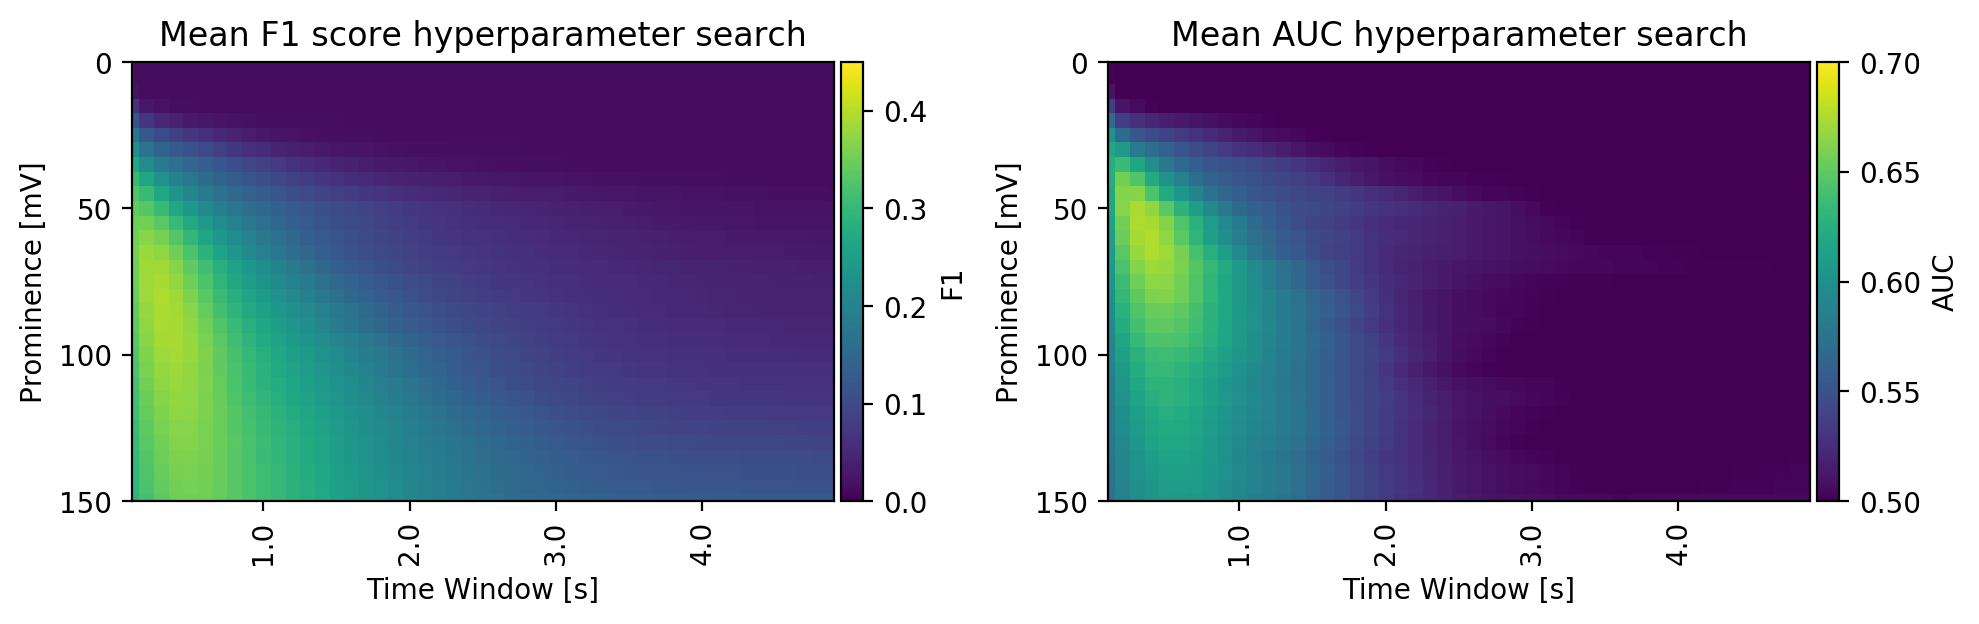

In [85]:
plt.figure(figsize=(10,10), dpi=200)
plt.subplot(121)
im = plt.imshow(np.array(dict_conips_ECOG["F1_landscape"]).mean(axis=0))
plt.ylabel("Prominence [mV]"); plt.xlabel("Time Window [s]")
plt.locator_params(nbins=10)
plt.yticks(np.arange(0,thr_space.shape[0],10),thr_space[::10])
plt.xticks(np.arange(0,int(time_window_space.shape[0]/1),10),np.round(time_window_space[::1]/10,1)[::10], rotation=90)
plt.xlim(1,time_window_space.shape[0]-1)
cb = plt.colorbar(im,fraction=0.03, pad=0.01)
plt.clim(0,0.45)
cb.set_label("F1")
plt.title("Mean F1 score hyperparameter search")
plt.subplot(122)
im = plt.imshow(np.array(dict_conips_ECOG["AUC_landscape"]).mean(axis=0))
plt.ylabel("Prominence [mV]"); plt.xlabel("Time Window [s]")
plt.locator_params(nbins=10)
plt.yticks(np.arange(0,thr_space.shape[0],10),thr_space[::10])
plt.xticks(np.arange(0,int(time_window_space.shape[0]/1),10),np.round(time_window_space[::1]/10,1)[::10], rotation=90)
plt.xlim(1,time_window_space.shape[0]-1)
cb = plt.colorbar(im,fraction=0.03, pad=0.01)
plt.clim(0.5,0.7)
cb.set_label("AUC")
plt.title("Mean AUC hyperparameter search")
plt.tight_layout()
plt.show()

In [22]:
def set_box_color(bp, color):
    #plt.setp(bp['boxes'], color='black')
    #plt.setp(bp['whiskers'], color='black')
    #plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')
    l_ = []
    l_.append(color)
    l_ = l_*len(bp['boxes']) 
    for patch, color_ in zip(bp['boxes'], l_):
        patch.set_facecolor(color_)
    
def my_box_plot_comparison_here(data_a, data_b, label_1='contralateral', label_2='ipsilateral'):
    ran = len(data_a)
    ticks = [str(i) for i in range(ran)]
    bpl = plt.boxplot(data_a, positions=np.array(range(ran))*2.0-0.4, showmeans=True, widths=0.45, patch_artist=True)
    bpr = plt.boxplot(data_b, positions=np.array(range(ran))*2.0+0.4, showmeans=True,widths=0.45, patch_artist=True)
    set_box_color(bpl, 'red') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, 'blue')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='red', label=label_1)
    plt.plot([], c='blue', label=label_2)

    plt.xlim(-2, len(ticks)*2)
    plt.tight_layout()
    #plt.xticks(range(0, len(ticks) * 2, 2), ['LM', 'NN', 'SPOC t-lag', 'XGB '+r'$\beta$'+ r'$\gamma$', 'XGB'], rotation=90)
    plt.xticks(range(0, len(ticks) * 2, 2), ['ConIps', 'Con', 'Ips'], rotation=90)
    plt.legend(loc='upper right')
    

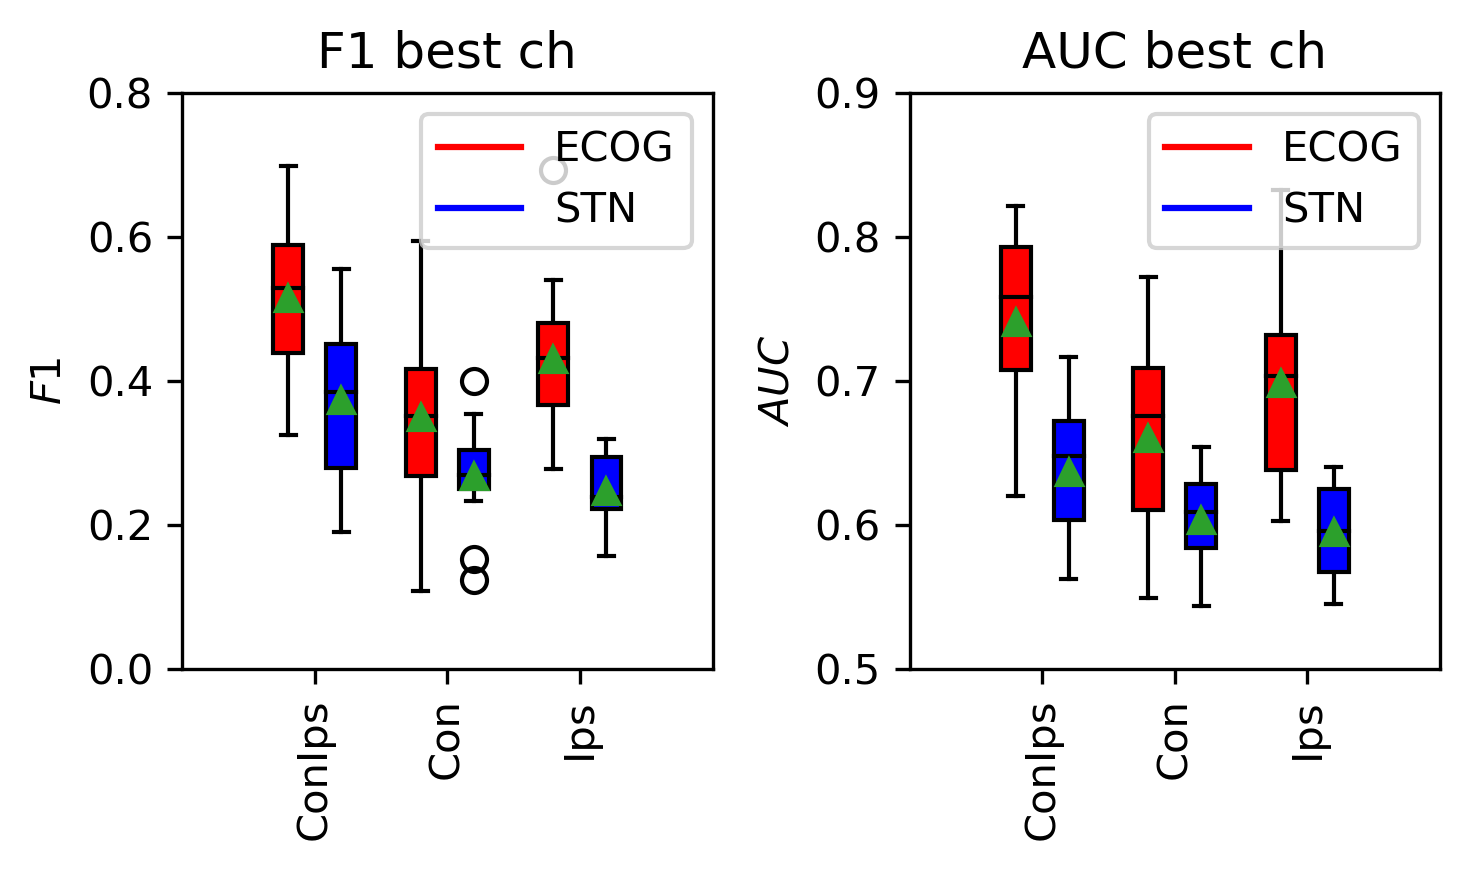

In [25]:
plt.figure(figsize=(5,3), dpi=300)
plt.subplot(121)
plt.title('F1 best ch')
my_box_plot_comparison_here([dict_conips_ECOG["F1"],  dict_con_ECOG["F1"], dict_ips_ECOG["F1"]], \
                            [dict_conips_STN["F1"],  dict_con_STN["F1"], dict_ips_STN["F1"]], \
                            label_1='ECOG', label_2='STN')
plt.ylabel(r'$F1$')
plt.ylim(0, 0.8)
plt.subplot(122)
plt.title('AUC best ch')
my_box_plot_comparison_here([dict_conips_ECOG["AUC"],  dict_con_ECOG["AUC"], dict_ips_ECOG["AUC"]], \
                            [dict_conips_STN["AUC"],  dict_con_STN["AUC"], dict_ips_STN["AUC"]], \
                            label_1='ECOG', label_2='STN')
plt.ylabel(r'$AUC$')
plt.ylim(0.5, 0.9)
plt.tight_layout()

### best threshold and timewindow analysis

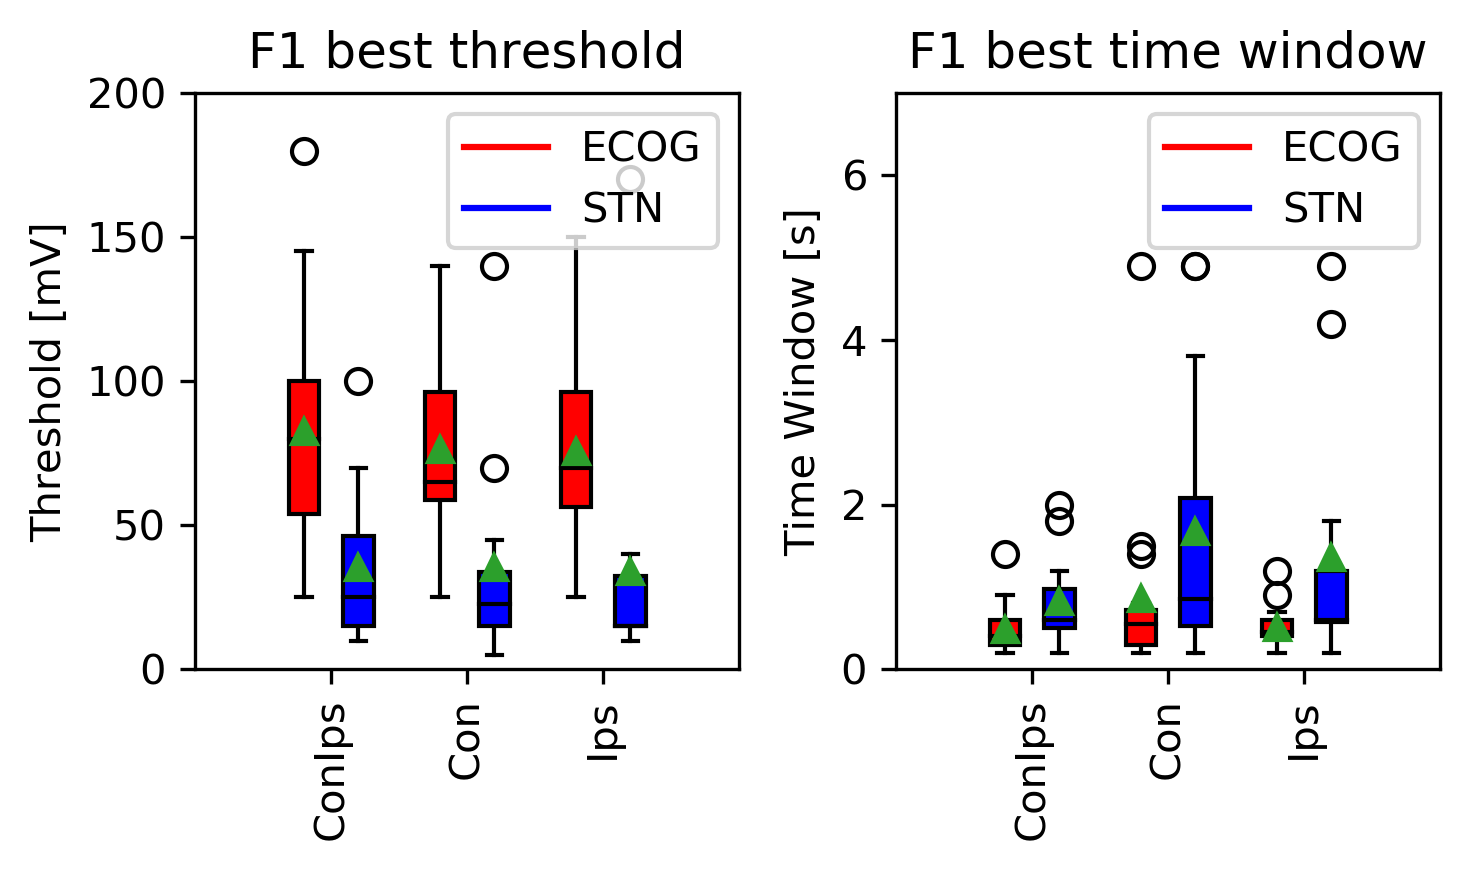

In [28]:
plt.figure(figsize=(5,3), dpi=300)
plt.subplot(121)
plt.title('F1 best threshold')
my_box_plot_comparison_here([dict_conips_ECOG["thr"],  dict_con_ECOG["thr"], dict_ips_ECOG["thr"]], \
                            [dict_conips_STN["thr"],  dict_con_STN["thr"], dict_ips_STN["thr"]], \
                            label_1='ECOG', label_2='STN')
plt.ylabel('Threshold [mV]')
plt.ylim(0, 200)
plt.subplot(122)
plt.title('F1 best time window')
my_box_plot_comparison_here([dict_conips_ECOG["tw"],  dict_con_ECOG["tw"], dict_ips_ECOG["tw"]], \
                            [dict_conips_STN["tw"],  dict_con_STN["tw"], dict_ips_STN["tw"]], \
                            label_1='ECOG', label_2='STN')
plt.ylabel("Time Window [s]")
plt.ylim(0, 7)
plt.tight_layout()

### Plot F1 and AUC on the Sculp and 

In [86]:
def get_arr(measure_con, measure_ips):
    coord_ECOG = []; coord_STN = []
    p_ECOG_CON = []; p_ECOG_IPS = []
    p_STN_CON = []; p_STN_IPS = []
    for f in files:
        if "ECOG" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        if res["coords"][0] > 30:
            continue
        
        p_STN_CON.append(res[measure_con])
        p_STN_IPS.append(res[measure_ips])
        coord_STN.append(res["coords"])
        
    for f in files:
        if "STN" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        
        p_ECOG_CON.append(res[measure_con])
        p_ECOG_IPS.append(res[measure_ips])
        coord_ECOG.append(res["coords"])
    return np.array(coord_ECOG), np.array(coord_STN), np.array(p_ECOG_CON), np.array(p_ECOG_IPS), np.array(p_STN_CON), np.array(p_STN_IPS)

In [92]:
faces = io.loadmat('..\\..\\icn_plots\\faces.mat')
Vertices = io.loadmat('..\\..\\icn_plots\\Vertices.mat')
grid = io.loadmat('..\\..\\icn_plots\\grid.mat')['grid']
stn_surf = io.loadmat('..\\..\\icn_plots\\STN_surf.mat')
x_ = stn_surf['vertices'][::2,0]
y_ = stn_surf['vertices'][::2,1]
x_ecog = Vertices['Vertices'][::1,0]
y_ecog = Vertices['Vertices'][::1,1]
x_stn = stn_surf['vertices'][::1,0]
y_stn = stn_surf['vertices'][::1,1]

In [110]:
df_all = pd.read_csv("C:\\Users\\ICN_admin\\Documents\\icn\\ECOG_vs_STN\\Results_Analysis\\df_all.csv", index_col=0)

In [94]:
files = os.listdir(PATH_SW_SAVE)

In [97]:
np.load(os.path.join(PATH_SW_SAVE, files[0]), allow_pickle=True).tolist()["F1_conips_max"]

0.6220472440944882

In [145]:
# for reading coords
comb_runs = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\Combined_runs"

loc = "ECOG"
df_subs = pd.DataFrame()
for loc in ["ECOG", "STN"]:
    for sub in subjects:
        print(sub)
        f_ = [f for f in files if sub in f and loc in f]
        for f in f_:
            print(f)
            ch_name = f[f.find("ch_")+3:f.find(".npy")]
            with open(os.path.join(comb_runs, "sub_"+sub+"_comb.p"), 'rb') as f_:
                coords = pickle.load(f_)[ch_name]["coords"]
            res_dict = np.load(os.path.join(PATH_SW_SAVE, f), allow_pickle=True).tolist()
            df_subs = df_subs.append({
                "F1":res_dict["F1_conips_max"],
                "AUC":res_dict["AUC_conips_max"],
                "x":coords[0],
                "y":coords[1],
                "z":coords[2], 
                "ch_name":ch_name,
                "sub":sub, 
                "loc":loc
            },ignore_index=True)

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015


In [150]:
pd.to_pickle(df_subs, "pd_sub_coords_perf.p")

In [151]:
df_subs

,AUC,F1,ch_name,loc,sub,x,y,z
0,0.759102,0.622047,ECOG_RIGHT_0,ECOG,000,37.318174,-48.610127,61.797655
1,0.800698,0.634933,ECOG_RIGHT_1,ECOG,000,40.159894,-37.315930,64.311716
2,0.801503,0.693333,ECOG_RIGHT_2,ECOG,000,40.943036,-27.217785,64.095184
3,0.821775,0.698759,ECOG_RIGHT_3,ECOG,000,39.783955,-17.005231,63.866181
4,0.757963,0.585118,ECOG_RIGHT_4,ECOG,000,39.688136,-5.528025,61.682543
...,...,...,...,...,...,...,...,...
314,0.620490,0.250839,STN_LEFT_1,STN,013,-14.888300,-17.947000,-9.350200
315,0.620490,0.236909,STN_LEFT_2,STN,013,-15.504000,-17.212900,-7.223300
316,0.508394,0.457810,STN_RIGHT_0,STN,014,14.812955,-14.134391,-3.867494
317,0.649447,0.460229,STN_RIGHT_1,STN,014,15.164177,-13.053698,-1.966183


In [182]:
def plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit="", meas="", \
                    clim_l=0.5, clim_h=0.7):
    height_STN = 1
    height_ECOG = 2.5*height_STN
    fig, axes = plt.subplots(2,2, facecolor=(0,0,0), gridspec_kw={'height_ratios': [height_ECOG, height_STN]}, \
                             figsize=(14,9))#, dpi=300)
    for idx in range(2):
        axes[0, idx].scatter(x_ecog, y_ecog, c="gray", s=0.001)
        axes[1, idx].scatter(x_stn, y_stn, c="gray", s=0.001)
        
        if idx == 0: # CON
            pos_ecog = axes[0, idx].scatter(np.array(coord_ECOG)[:,0], \
                                        np.array(coord_ECOG)[:,1], c=p_ECOG_CON, s=10, alpha=0.8, cmap='viridis')

            c = p_STN_CON
            axes[0, idx].set_title(meas+'\nF1 score', color='white')
        if idx == 1:
            pos_ecog = axes[0, idx].scatter(np.array(coord_ECOG)[:,0], \
                                        np.array(coord_ECOG)[:,1], c=p_ECOG_IPS, s=10, alpha=0.8, cmap='viridis')
            axes[0, idx].set_title(meas+'\nAUC', color='white')
            c = p_STN_IPS
        cbar_ecog = fig.colorbar(pos_ecog, ax=axes[0, idx])
        
        cbar_ecog.ax.tick_params(axis='y', color='white')
        cbar_ecog.ax.set_yticklabels(labels=np.round(cbar_ecog.get_ticks(),2),color='white')
        cbar_ecog.outline.set_edgecolor('white')

            
        #if len(c) == 4:
        #    c_restructure = [c[0], (c[0]+c[1])/2, (c[1]+c[2])/2, c[2]]
        #elif len(c) == 8:
        #    c_restructure = [c[0], (c[0]+c[1])/2, (c[1]+c[2])/2, c[2], 
        #                    c[4], (c[4]+c[5])/2, (c[5]+c[6])/2, c[6]]
        pos_stn = axes[1, idx].scatter(np.array(coord_STN)[:,0], np.abs(np.array(coord_STN)[:,1])*-1, c=c, s=10, alpha=0.8, cmap='viridis')
        cbar_stn = fig.colorbar(pos_stn, ax=axes[1, idx]); 
        cbar_stn.outline.set_edgecolor('white')
        cbar_stn.ax.set_yticklabels(labels=np.round(cbar_stn.get_ticks(),2),color='white')
        cbar_stn.set_label(unit, color="white")
        if idx == 0:
            pos_stn.set_clim(clim_l,clim_h)#; cbar_stn.remove()
            pos_ecog.set_clim(clim_l,clim_h); 
            cbar_ecog.set_label("F1", color="white")
            cbar_stn.set_label("F1", color="white")
        else:
            pos_stn.set_clim(0.5,0.8)#; cbar_stn.remove()
            pos_stn.set_clim(0.5,0.8); 
            cbar_ecog.set_label("AUC", color="white")
            cbar_stn.set_label("AUC", color="white")
        
        
        axes[0, idx].axes.set_aspect('equal', anchor='C')
        axes[0, idx].set_facecolor((0,0,0))
        axes[1, idx].axes.set_aspect('equal', anchor='C')
        axes[1, idx].set_facecolor((0,0,0))

In [183]:
ch_coords_ECOG = np.concatenate((np.expand_dims(df_subs[df_subs["loc"] == "ECOG"]["x"], axis=1), 
                np.expand_dims(df_subs[df_subs["loc"] == "ECOG"]["y"], axis=1),
                np.expand_dims(df_subs[df_subs["loc"] == "ECOG"]["z"], axis=1)), axis=1)
ch_coords_STN = np.concatenate((np.expand_dims(df_subs[df_subs["loc"] == "STN"]["x"], axis=1), 
                np.expand_dims(df_subs[df_subs["loc"] == "STN"]["y"], axis=1),
                np.expand_dims(df_subs[df_subs["loc"] == "STN"]["z"], axis=1)), axis=1)

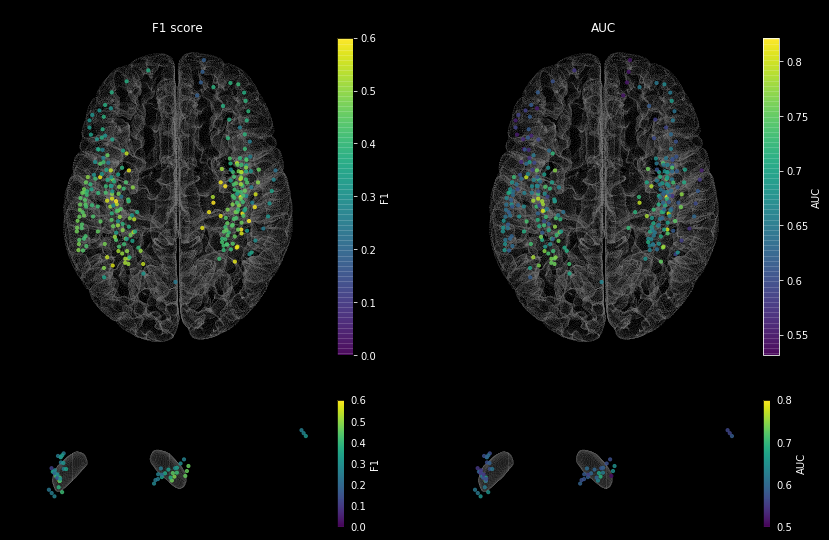

In [190]:
plot_all_in_one(list(ch_coords_ECOG), list(ch_coords_STN), df_subs[df_subs["loc"] == "ECOG"]["F1"], 
                df_subs[df_subs["loc"] == "ECOG"]["AUC"], 
                df_subs[df_subs["loc"] == "STN"]["F1"], 
                df_subs[df_subs["loc"] == "STN"]["AUC"], unit="", meas="", clim_l=0, clim_h=0.6)